In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons


import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [2]:
## Generating Binary Classification Dataset

x,y = make_moons(n_samples=250, noise=0.25, random_state=1)

In [3]:
x

array([[-0.13249283,  0.79819677],
       [ 2.31843898,  0.99177544],
       [ 1.42186457,  0.34604436],
       [ 0.79480671, -0.20627281],
       [-0.97020185,  0.95784991],
       [ 1.76079819, -0.2428572 ],
       [-0.20634621,  1.1325037 ],
       [ 2.12685472, -0.02683228],
       [ 0.95372432, -0.77040037],
       [ 1.19533458,  0.11281015],
       [ 1.93767258,  0.29814377],
       [ 1.24255425, -0.31207617],
       [-0.84716361,  0.23572382],
       [ 0.89311669, -0.33739211],
       [ 0.05940713,  0.61998868],
       [-0.47188505,  0.31024837],
       [ 1.18377304,  0.049632  ],
       [ 0.38543722,  0.93637792],
       [ 0.74090447,  0.60217849],
       [-0.27074376,  0.68091205],
       [ 1.69148983, -0.32052492],
       [ 0.71357227,  0.68459783],
       [-0.61821075,  0.62670905],
       [ 1.22125108, -0.4462956 ],
       [-0.44719439, -0.37292191],
       [-1.15371635,  0.35171032],
       [ 2.62919434,  0.36190819],
       [ 1.97899437,  0.19276891],
       [ 0.90413249,

In [4]:
y

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0])

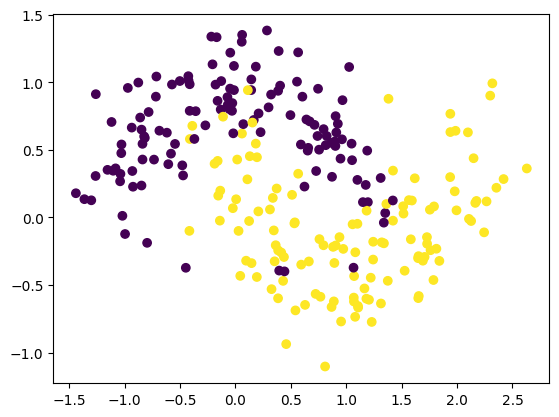

In [5]:
## Data Visualization

plt.scatter(x[:,0], x[:,1],c=y)

# Large Random Weight Initialization with 'sigmoid' as activation function

In [6]:
## Building ANN

model = Sequential()
model.add(Dense(2, activation='sigmoid', input_dim=2))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 27 (108.00 Byte)
Trainable params: 27 (108.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
## Checking the Initial Weigths

model.get_weights()

[array([[-0.4774775 , -0.16913891],
        [-0.4328435 , -0.6753608 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.6447657 , -0.21436274],
        [ 0.9285048 , -0.5378591 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.96512717, -0.52829283],
        [ 0.76214874, -0.8116933 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.812785  , -0.3371951 ],
        [-0.67559904,  0.9491888 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.77690804],
        [1.1230186 ]], dtype=float32),
 array([0.], dtype=float32)]

We get 10 arrays, 2 for each layers, First array of each layer gives weights and 2nd array of each layer gives bias. So we will only make change in the weights and keep the bias as zero

In [8]:
## Setting the weights randomly using np.random.rand(shape) , this function will give random values for a given shape
## Now model.get_weights()[0].shape is a tuple so to pass the shape in the np.random.rand() we use shape indexing i.e
## lets say for layer 1 we using
## np.random.rand(model.get_weights()[0].shape[0],model.get_weights()[0].shape[1])
## model.get_weights()[0].shape[0] will give the 0th index value of the shape
## model.get_weights()[0].shape[1] will give the 1th index value of the shape
## Lets say we have model.get_weights()[0].shape >> (2,3) so
## model.get_weights()[0].shape[0] will give 2 as output and
## model.get_weights()[0].shape[1] will give 3 as output


initial_weights = model.get_weights()

In [9]:
## Setting the weights randomly using np.random.rand() and and keeping the bias as zero

initial_weights = model.get_weights()

initial_weights[0]= np.random.rand(model.get_weights()[0].shape[0],model.get_weights()[0].shape[1]) # Weights of Layer 1
initial_weights[1]= np.zeros(model.get_weights()[1].shape)                                          # Bias of Layer 1
initial_weights[2]= np.random.rand(model.get_weights()[2].shape[0],model.get_weights()[2].shape[1]) # Weights of Layer 2
initial_weights[3]= np.zeros(model.get_weights()[3].shape)                                          # Bias of Layer 2
initial_weights[4]= np.random.rand(model.get_weights()[4].shape[0],model.get_weights()[4].shape[1]) # Weights of Layer 3
initial_weights[5]= np.zeros(model.get_weights()[5].shape)                                          # Bias of Layer 3
initial_weights[6]= np.random.rand(model.get_weights()[6].shape[0],model.get_weights()[6].shape[1]) # Weights of Layer 4
initial_weights[7]= np.zeros(model.get_weights()[7].shape)                                          # Bias of Layer 4
initial_weights[8]= np.random.rand(model.get_weights()[8].shape[0],model.get_weights()[8].shape[1]) # Weights of Layer 5
initial_weights[9]= np.zeros(model.get_weights()[9].shape)                                          # Bias of Layer 5

model.set_weights(initial_weights) # to set the weights

In [10]:
## Checking the result

model.get_weights()

[array([[0.5334923 , 0.23462726],
        [0.7314135 , 0.33529434]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.64789826, 0.9459633 ],
        [0.15764616, 0.698864  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.9918902 , 0.16546923],
        [0.98209053, 0.7861213 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.05766131, 0.2079891 ],
        [0.3329883 , 0.25983438]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.12270717],
        [0.65466326]], dtype=float32),
 array([0.], dtype=float32)]

Weights are set to large random values between 0 to 1  and bias are set to 0

In [11]:
## Training the Model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x,y, epochs= 100, validation_split = 0.2 , verbose =0  )

In [12]:
## Checking the weights posting training

model.get_weights()

[array([[0.84100574, 0.5423687 ],
        [0.42899153, 0.04392119]], dtype=float32),
 array([-0.15766782, -0.14902784], dtype=float32),
 array([[0.5783496 , 0.8595999 ],
        [0.09383103, 0.6183978 ]], dtype=float32),
 array([-0.13683423, -0.15648991], dtype=float32),
 array([[0.86108035, 0.04227974],
        [0.85968673, 0.67015105]], dtype=float32),
 array([-0.14691116, -0.13729572], dtype=float32),
 array([[0.01102388, 0.03131461],
        [0.28883836, 0.08174661]], dtype=float32),
 array([-0.03267811, -0.19444592], dtype=float32),
 array([[-0.08090375],
        [ 0.45639598]], dtype=float32),
 array([-0.20897943], dtype=float32)]

9600/9600 [==============================] - 13s 1ms/step


<Axes: >

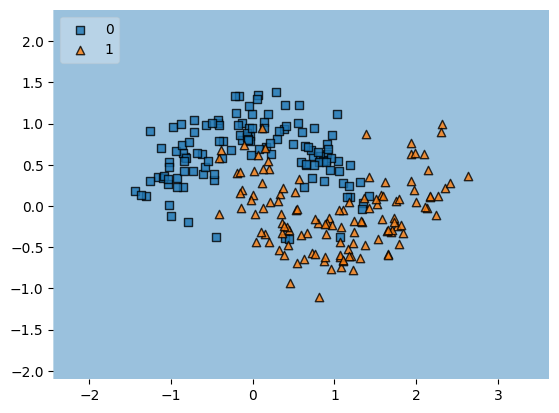

In [13]:
# Checking the decsion boundaries

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x,y, clf =model, legend =2)

 Model is showing bad results indication all lies in blue region.

# Random Large Weigth Initialization with 'tanh' as activation fucntion (between 0 to 1)

In [14]:
## Buulding ANN

model = Sequential()
model.add(Dense(2, activation='tanh', input_dim=2))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 2)                 6         
                                                                 
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 27 (108.00 Byte)
Trainable params: 27 (108.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
## Checking the Initial Weigths

model.get_weights()

[array([[-0.36177754, -0.34308386],
        [-0.48719472,  1.1645092 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.611083  , -0.38329285],
        [ 1.2082337 , -0.15182996]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.451343  ,  0.45026731],
        [ 0.8715235 , -1.0411972 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.9575826 ,  0.76788425],
        [-0.7665267 , -0.7986131 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.5510727],
        [-0.6382722]], dtype=float32),
 array([0.], dtype=float32)]

In [16]:
## Setting the weights randomly using np.random.rand() and and keeping the bias as zero

initial_weights = model.get_weights()

initial_weights[0]= np.random.rand(model.get_weights()[0].shape[0],model.get_weights()[0].shape[1]) # Weights of Layer 1
initial_weights[1]= np.zeros(model.get_weights()[1].shape)                                          # Bias of Layer 1
initial_weights[2]= np.random.rand(model.get_weights()[2].shape[0],model.get_weights()[2].shape[1]) # Weights of Layer 2
initial_weights[3]= np.zeros(model.get_weights()[3].shape)                                          # Bias of Layer 2
initial_weights[4]= np.random.rand(model.get_weights()[4].shape[0],model.get_weights()[4].shape[1]) # Weights of Layer 3
initial_weights[5]= np.zeros(model.get_weights()[5].shape)                                          # Bias of Layer 3
initial_weights[6]= np.random.rand(model.get_weights()[6].shape[0],model.get_weights()[6].shape[1]) # Weights of Layer 4
initial_weights[7]= np.zeros(model.get_weights()[7].shape)                                          # Bias of Layer 4
initial_weights[8]= np.random.rand(model.get_weights()[8].shape[0],model.get_weights()[8].shape[1]) # Weights of Layer 5
initial_weights[9]= np.zeros(model.get_weights()[9].shape)                                          # Bias of Layer 5

model.set_weights(initial_weights) # to set the weights

In [17]:
## Checking the result

model.get_weights()

[array([[0.96366984, 0.07989712],
        [0.598846  , 0.23727356]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.674534  , 0.24573617],
        [0.23004608, 0.7682087 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.03442479, 0.9560318 ],
        [0.75054324, 0.6335689 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.77484834, 0.9848263 ],
        [0.6212394 , 0.3594924 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.9127816],
        [0.1780965]], dtype=float32),
 array([0.], dtype=float32)]

Weights are set to large random values between 0 to 1  and bias are set to 0

In [18]:
## Training the Model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x,y, epochs= 100, validation_split = 0.2, verbose=0 )

In [19]:
## Checking the weights after training

model.get_weights()

[array([[ 1.1854254 ,  0.17017663],
        [ 0.09097054, -0.49262425]], dtype=float32),
 array([ 0.24694443, -0.03613336], dtype=float32),
 array([[0.5092549 , 0.07861887],
        [0.7153358 , 1.342583  ]], dtype=float32),
 array([ 0.02267909, -0.04348974], dtype=float32),
 array([[0.145258 , 0.9385385],
        [1.2488352, 1.0647122]], dtype=float32),
 array([-0.03865386, -0.03587097], dtype=float32),
 array([[1.2859421 , 1.6064425 ],
        [0.89508784, 0.71286553]], dtype=float32),
 array([-0.04922953, -0.0411862 ], dtype=float32),
 array([[1.4784131],
        [0.7851346]], dtype=float32),
 array([-0.07620081], dtype=float32)]

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

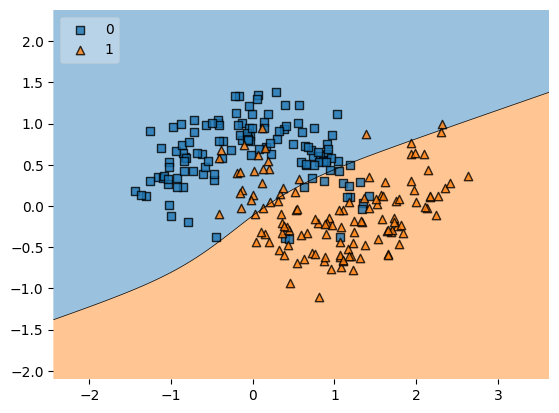

In [20]:
# Checking the decsion boundaries

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x,y, clf =model, legend =2)

Model Act as Slighly non Linear Model however still unable to capture the complete Non Linearity of the data

# Random Large Weight Initialization with 'relu' as activation fucntion(between 0 to 1)

In [21]:
## Buulding ANN

model = Sequential()
model.add(Dense(2, activation='relu', input_dim=2))
model.add(Dense(2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 2)                 6         
                                                                 
 dense_12 (Dense)            (None, 2)                 6         
                                                                 
 dense_13 (Dense)            (None, 2)                 6         
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 27 (108.00 Byte)
Trainable params: 27 (108.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
## Checking the Initial Weigths

model.get_weights()

[array([[ 1.0403358, -0.07286  ],
        [-0.955376 , -0.6650044]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.72462356,  1.2065619 ],
        [-0.04337394, -0.04001307]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.0989122 , -0.43544674],
        [ 0.4193139 ,  0.4333948 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.7443737 , 1.1950463 ],
        [0.7687378 , 0.04877079]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.09390414],
        [ 1.14845   ]], dtype=float32),
 array([0.], dtype=float32)]

In [23]:
## Setting the weights randomly using np.random.rand() and and keeping the bias as zero

initial_weights = model.get_weights()

initial_weights[0]= np.random.rand(model.get_weights()[0].shape[0],model.get_weights()[0].shape[1]) # Weights of Layer 1
initial_weights[1]= np.zeros(model.get_weights()[1].shape)                                          # Bias of Layer 1
initial_weights[2]= np.random.rand(model.get_weights()[2].shape[0],model.get_weights()[2].shape[1]) # Weights of Layer 2
initial_weights[3]= np.zeros(model.get_weights()[3].shape)                                          # Bias of Layer 2
initial_weights[4]= np.random.rand(model.get_weights()[4].shape[0],model.get_weights()[4].shape[1]) # Weights of Layer 3
initial_weights[5]= np.zeros(model.get_weights()[5].shape)                                          # Bias of Layer 3
initial_weights[6]= np.random.rand(model.get_weights()[6].shape[0],model.get_weights()[6].shape[1]) # Weights of Layer 4
initial_weights[7]= np.zeros(model.get_weights()[7].shape)                                          # Bias of Layer 4
initial_weights[8]= np.random.rand(model.get_weights()[8].shape[0],model.get_weights()[8].shape[1]) # Weights of Layer 5
initial_weights[9]= np.zeros(model.get_weights()[9].shape)                                          # Bias of Layer 5

model.set_weights(initial_weights) # to set the weights

In [24]:
## Checking the result

model.get_weights()

[array([[0.44427153, 0.63628453],
        [0.9653949 , 0.16042504]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.27897  , 0.7855714],
        [0.3906425, 0.9036039]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.3605648 , 0.7338637 ],
        [0.95071423, 0.4739859 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.18116876, 0.7177246 ],
        [0.33918574, 0.07588277]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.2280184 ],
        [0.42825305]], dtype=float32),
 array([0.], dtype=float32)]

Weights are set to large random values between 0 to 1  and bias are set to 0

In [25]:
## Training the Model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x,y, epochs= 100, validation_split = 0.2, verbose=0 )

In [26]:
## Checking the weights after training

model.get_weights()

[array([[ 0.5763389,  0.8330282],
        [ 0.545391 , -0.6154136]], dtype=float32),
 array([-0.30359325,  0.07124903], dtype=float32),
 array([[-0.2989416 ,  0.27041358],
        [ 0.87175393,  1.3294536 ]], dtype=float32),
 array([-0.03295738, -0.10836527], dtype=float32),
 array([[0.72884136, 1.1756425 ],
        [1.0378586 , 0.59117675]], dtype=float32),
 array([-0.1069205 , -0.10025764], dtype=float32),
 array([[0.3520718 , 0.86503667],
        [0.59895766, 0.3074619 ]], dtype=float32),
 array([-0.07701778, -0.10634113], dtype=float32),
 array([[0.4627549],
        [0.6001368]], dtype=float32),
 array([-0.5048319], dtype=float32)]

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

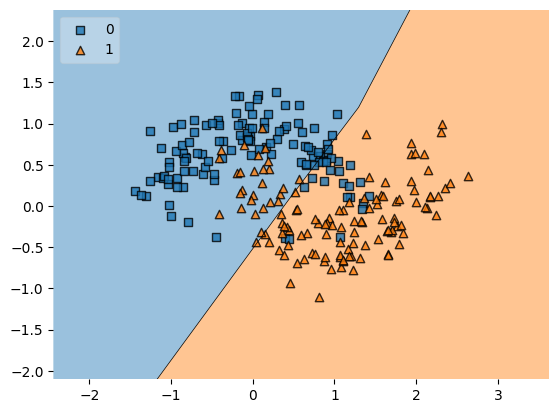

In [27]:
# Checking the decsion boundaries

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x,y, clf =model, legend =2)

Similar to tanh Model is showing sligly Non-Linear Curve However fail to capture the complete non-linearity of the data